In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets

In [2]:
mnist = datasets.load_digits()

In [3]:
X, y = mnist.data, mnist.target

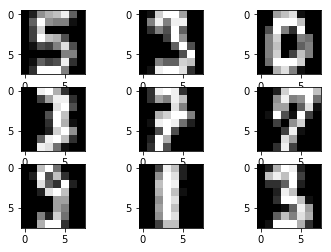

In [34]:
cnt = 1
for i in range(1, 4):
    for j in range(1, 4):
        plt.subplot(3, 3, cnt)
        cnt += 1
        plt.imshow(X[np.random.randint(0, len(X))].reshape(8, 8), cmap="gray")

In [4]:
import sklearn.linear_model
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.neighbors
import sklearn.metrics
import sklearn.neural_network

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
def eval_regression(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [121]:
print(eval_regression(sklearn.linear_model.LinearRegression()))
print(eval_regression(sklearn.ensemble.RandomForestRegressor()))
print(eval_regression(sklearn.linear_model.SGDClassifier()))

3.91532883623
1.0305
1.16666666667


C:\dev\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [63]:
scaler = sklearn.preprocessing.StandardScaler()

In [64]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
class Scaler:
    def fit(data):
        self.mean = np.mean(data)
        self.std = np.std(data)
        
    def transform(data):
        return (data - self.mean) / self.std

In [68]:
knn = sklearn.neighbors.KNeighborsClassifier()

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
knn.predict(X_test)

array([1, 5, 3, 5, 9, 9, 9, 5, 0, 9, 2, 3, 1, 2, 0, 9, 6, 0, 6, 5, 0, 3, 2,
       8, 0, 3, 2, 0, 4, 9, 4, 5, 3, 0, 0, 2, 6, 3, 6, 0, 5, 6, 4, 2, 5, 1,
       7, 1, 4, 5, 7, 1, 1, 0, 6, 5, 5, 4, 2, 4, 6, 4, 5, 8, 6, 1, 5, 4, 7,
       0, 3, 1, 5, 7, 1, 1, 1, 8, 1, 0, 1, 9, 8, 0, 4, 9, 3, 5, 2, 6, 4, 5,
       8, 9, 2, 7, 7, 2, 9, 5, 7, 4, 4, 1, 8, 1, 7, 5, 2, 0, 3, 8, 8, 4, 6,
       8, 6, 7, 9, 5, 0, 4, 4, 6, 2, 7, 0, 6, 4, 3, 8, 0, 7, 2, 6, 9, 2, 1,
       4, 6, 2, 3, 5, 0, 8, 3, 9, 7, 1, 7, 7, 9, 0, 5, 3, 9, 6, 0, 7, 8, 9,
       5, 0, 0, 3, 6, 7, 4, 8, 9, 5, 2, 1, 7, 2, 5, 6, 3, 2, 6, 3, 5, 9, 8,
       0, 8, 5, 9, 5, 2, 3, 2, 9, 4, 0, 7, 0, 3, 6, 6, 2, 7, 7, 1, 9, 2, 6,
       8, 6, 1, 3, 9, 2, 1, 2, 1, 7, 8, 0, 6, 6, 6, 3, 0, 9, 9, 8, 1, 0, 2,
       4, 5, 3, 2, 3, 7, 9, 1, 0, 0, 5, 7, 6, 7, 3, 3, 1, 6, 6, 1, 5, 2, 1,
       5, 0, 8, 6, 3, 6, 7, 0, 9, 4, 7, 6, 2, 7, 3, 0, 3, 0, 8, 5, 1, 0, 3,
       8, 1, 1, 2, 1, 4, 6, 8, 4, 7, 5, 4, 4, 2, 6, 2, 5, 0, 8, 7, 0, 4, 1,
       1, 4,

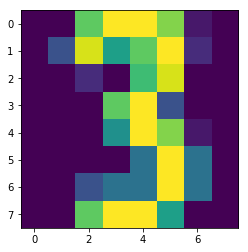

In [78]:
plt.imshow(X_test[2].reshape(8, 8))

In [79]:
X_test[0]

array([  0.,   0.,   1.,  12.,  10.,   3.,   0.,   0.,   0.,   0.,   7.,
        16.,  16.,   7.,   0.,   0.,   0.,   0.,  12.,  16.,  16.,   3.,
         0.,   0.,   0.,   0.,  14.,  16.,  16.,   2.,   0.,   0.,   0.,
         1.,  15.,  16.,  16.,   5.,   0.,   0.,   0.,   0.,  15.,  16.,
        15.,   2.,   0.,   0.,   0.,   0.,  11.,  16.,  16.,   8.,   0.,
         0.,   0.,   0.,   1.,   7.,  12.,  10.,   0.,   0.])

In [88]:
y_train[np.argmin(np.linalg.norm(X_train - X_test[2], axis=1))]

3

In [92]:
sklearn.metrics.accuracy_score(y_test, knn.predict(X_test))

0.99444444444444446

In [ ]:
sklearn.linear_model.LogisticRegression()

In [93]:
def eval_classification(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return sklearn.metrics.accuracy_score(y_test, y_pred)

In [111]:
logreg = sklearn.linear_model.LogisticRegression()
eval_classification(logreg)

0.95833333333333337

In [95]:
eval_classification(sklearn.neighbors.KNeighborsClassifier())

0.99444444444444446

In [104]:
net = sklearn.neural_network.MLPClassifier((64, 64), warm_start=True)
# for i in range(5): net.fit(X_train, y_train)

In [105]:
eval_classification(net)

0.9916666666666667

In [110]:
for i in range(5): net.fit(X_train, y_train)
eval_classification(net)

0.9916666666666667

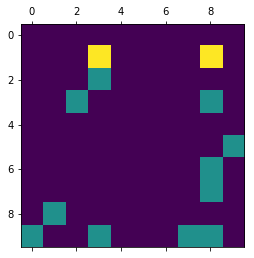

In [119]:
conf = sklearn.metrics.confusion_matrix(y_test, logreg.predict(X_test))
np.fill_diagonal(conf, 0)
plt.matshow(conf, fignum=True)

In [116]:
sklearn.metrics.confusion_matrix(y_test, logreg.predict(X_test))

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  2,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 34,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 33,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  1,  1, 30]], dtype=int64)

In [120]:
print(sklearn.metrics.classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        46
          1       0.97      0.89      0.93        37
          2       0.97      0.97      0.97        35
          3       0.89      0.94      0.92        35
          4       1.00      1.00      1.00        34
          5       1.00      0.97      0.99        36
          6       1.00      0.97      0.99        39
          7       0.97      0.97      0.97        36
          8       0.82      0.96      0.89        28
          9       0.97      0.88      0.92        34

avg / total       0.96      0.96      0.96       360



In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("train.csv").values

In [5]:
X = df[:, 1:]
y = df[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [149]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [150]:
y_pred = knn.predict(X_test)

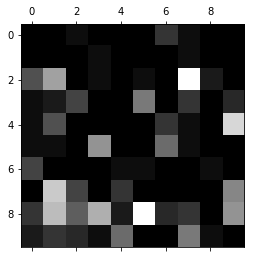

In [152]:
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
np.fill_diagonal(conf, 0)
plt.matshow(conf, fignum=True, cmap="gray")

In [155]:
print(sklearn.metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       807
          1       0.95      1.00      0.97       958
          2       0.97      0.95      0.96       841
          3       0.97      0.97      0.97       855
          4       0.98      0.97      0.97       819
          5       0.96      0.97      0.97       754
          6       0.98      0.99      0.98       850
          7       0.95      0.96      0.96       857
          8       0.99      0.91      0.95       834
          9       0.95      0.97      0.96       825

avg / total       0.97      0.97      0.97      8400



In [156]:
net = sklearn.neural_network.MLPClassifier((800, 800), warm_start=True)

In [85]:
import tensorflow as tf

In [86]:
features = [tf.feature_column.numeric_column("pixels", shape=(784,))]
est = tf.estimator.DNNClassifier([800, 800], n_classes=10, feature_columns=features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jakub\\AppData\\Local\\Temp\\tmpo6ooag5i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002231BCE5080>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [88]:
input_fn = tf.estimator.inputs.numpy_input_fn({"pixels": X_train_tr}, y_train, shuffle=True,
                                          num_epochs=10)

In [92]:
est.train(input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\jakub\AppData\Local\Temp\tmpo6ooag5i\model.ckpt-2625
INFO:tensorflow:Saving checkpoints for 2626 into C:\Users\jakub\AppData\Local\Temp\tmpo6ooag5i\model.ckpt.
INFO:tensorflow:loss = 0.498505, step = 2626
INFO:tensorflow:global_step/sec: 216.452
INFO:tensorflow:loss = 0.336842, step = 2726 (0.463 sec)
INFO:tensorflow:global_step/sec: 249.065
INFO:tensorflow:loss = 0.1566, step = 2826 (0.402 sec)
INFO:tensorflow:global_step/sec: 246.913
INFO:tensorflow:loss = 0.28998, step = 2926 (0.407 sec)
INFO:tensorflow:global_step/sec: 249.064
INFO:tensorflow:loss = 1.34661, step = 3026 (0.399 sec)
INFO:tensorflow:global_step/sec: 245.398
INFO:tensorflow:loss = 1.22934, step = 3126 (0.408 sec)
INFO:tensorflow:global_step/sec: 235.02
INFO:tensorflow:loss = 0.234201, step = 3226 (0.425 sec)
INFO:tensorflow:global_step/sec: 248.139
INFO:tensorflow:loss = 0.0662185, step = 3326 (0.403 sec)
INFO:tensorflow:glo

In [90]:
y_pred_tf = est.predict(tf.estimator.inputs.numpy_input_fn({"pixels": X_test}, shuffle=False))

In [93]:
est.evaluate(tf.estimator.inputs.numpy_input_fn({"pixels": X_test}, y_test, shuffle=False))

INFO:tensorflow:Starting evaluation at 2018-02-25-08:23:36
INFO:tensorflow:Restoring parameters from C:\Users\jakub\AppData\Local\Temp\tmpo6ooag5i\model.ckpt-5250
INFO:tensorflow:Finished evaluation at 2018-02-25-08:23:36
INFO:tensorflow:Saving dict for global step 5250: accuracy = 0.918452, average_loss = 25.5894, global_step = 5250, loss = 3256.83


{'accuracy': 0.91845238,
 'average_loss': 25.589376,
 'global_step': 5250,
 'loss': 3256.8298}

In [58]:
from tensorflow.python.keras.layers import Dense, Input, Dropout
from tensorflow.python.keras.models import Sequential

In [101]:
model = Sequential([
    Dense(800, input_shape=(784,), activation="relu"),
    Dense(800, activation="relu"),
    Dense(10, activation="softmax"),
])

In [102]:
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

In [110]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_tr = scaler.fit_transform(X_train.astype(np.float32))
y_train_oh = sklearn.preprocessing.OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).todense()

In [104]:
model.fit(X_train_tr, y_train_oh, epochs=5)

Epoch 1/5
33600/33600 [==============================]33600/33600 [==============================] - 6s 175us/step - loss: 0.2859 - acc: 0.9218

Epoch 2/5
33600/33600 [==============================]33600/33600 [==============================] - 6s 165us/step - loss: 0.1653 - acc: 0.9574

Epoch 3/5
33600/33600 [==============================]33600/33600 [==============================] - 5s 164us/step - loss: 0.1105 - acc: 0.9702

Epoch 4/5
33600/33600 [==============================]33600/33600 [==============================] - 6s 166us/step - loss: 0.1076 - acc: 0.9736

Epoch 5/5
33600/33600 [==============================]33600/33600 [==============================] - 6s 165us/step - loss: 0.0893 - acc: 0.9788



In [113]:
y_pred = model.predict_classes(scaler.transform(X_test.astype(np.float32)))

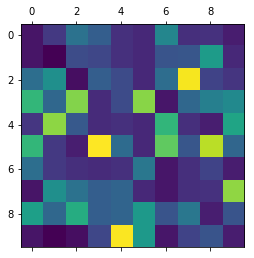

In [125]:
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
np.fill_diagonal(conf, 0)
conf = sklearn.preprocessing.StandardScaler().fit_transform(conf.astype(np.float32))
plt.matshow(conf)

In [6]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE()
X_embedding = tsne.fit_transform(X)

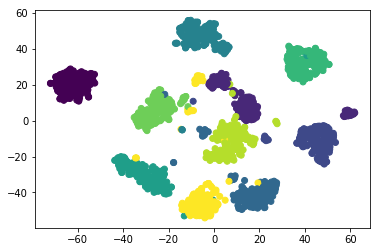

In [10]:
plt.scatter(X_embedding[:,0], X_embedding[:,1], c=y)